# HomeWork -4 Question 1 
## Authors:Satya Pavan(srnida),Ruchik Dama(rdama)


All the imports necessary are imported.

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams


import sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

MNIST Data set is imported from fetch_openml in sklearn

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [5]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Random sampling of data into train test splits

In [12]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set which can be varied.
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

Using Standard scaler for bettter results.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## PCA Dimensionality reduction 


#### We can reduce the dimensionality by using the standard PCA from sckit decompostion.
#### PCA reduces the dimensionality based on mean,variance and key features.
#### For this problem(MNIST Data set) if the dimensionality is reduced to 2 components it is yielding better results.
#### If the dimensionality is more than two or with 95% variance the centroids might be out side the cluster as the clusters are having          convex or concave shapes.

Case with pca with number of components selected from 95% variance:

In [24]:
train_img75=np.array(train_img)
train_lbl75=np.array(train_lbl)
test_img75=np.array(test_img)
pca = PCA(0.75)
pca=pca.fit(train_img95)

We reduced the dimensionality of the data to the features with 75% variance or the features with more weight.

In [25]:
pca.n_components_

118

number of components in the data are 118



In [26]:
train_img75 = pca.transform(train_img75)
test_img75 = pca.transform(test_img75)
train_img75,test_img75

(array([[-3.69763425,  9.66873129, -1.90737826, ..., -0.25815743,
          0.75277657, -0.58917461],
        [-1.07779826, -0.87794586,  4.44723208, ..., -0.01940975,
         -0.52370971, -0.32917728],
        [11.16636941, -2.85083447, -4.05506273, ...,  0.09673561,
         -0.11485606, -0.18820609],
        ...,
        [-2.02697033,  2.71303426, -4.31654801, ...,  1.1039467 ,
         -0.39387323, -0.84782444],
        [-6.14191248, -3.28310012,  4.72517219, ..., -0.08129036,
          0.44357237, -0.26253778],
        [-3.32049371, -6.76666636,  1.90715899, ...,  0.13181579,
         -1.16237111, -0.07777415]]),
 array([[ 9.3957676 ,  0.77401867,  0.87458164, ..., -0.62245126,
         -0.44484036,  1.33647473],
        [-1.92136163,  3.39653395, -3.3247254 , ...,  0.64213627,
          0.54953639, -0.86164429],
        [-7.81562461,  0.75219135,  1.00061721, ...,  0.16221521,
          0.61798698,  0.06298782],
        ...,
        [-8.13926503, -2.80932164,  4.08035207, ..., -

In [73]:
k75=OptimalK(train_img75)

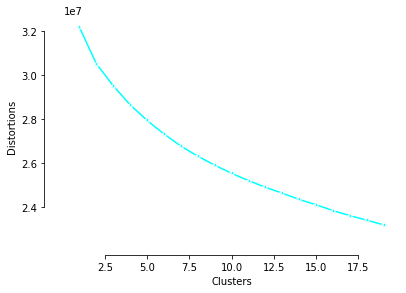

In [75]:
ax = sb.lineplot(range(1, 20), k75, marker = '*', color = 'cyan')
ax.set(xlabel='Clusters', ylabel='Distortions')
sb.despine(offset=20, trim=True)

Here K value can be 15


In [77]:
kmeans = KMeans(n_clusters=15, init='random', n_init=10, max_iter=300, random_state=0)
label75 = kmeans.fit_predict(train_img75)
# Cluster centroids
centroids = kmeans.cluster_centers_
print(label75)
print(centroids.shape)
print(kmeans.labels_)

[ 2  6 11 ...  8 13 14]
(15, 118)
[ 2  6 11 ...  8 13 14]


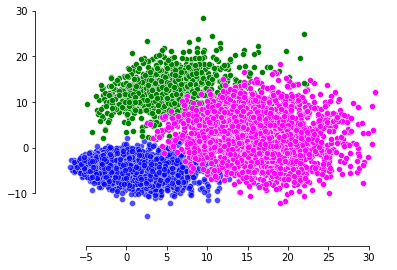

In [78]:
cluster0 = train_img75[label75 == 0]
cluster3 = train_img75[label75 == 3]
cluster7 = train_img75[label75 == 7]
 
#Plotting the results
ax = sb.scatterplot(cluster0[:,0], cluster0[:,1], color = 'blue', alpha=0.7, marker = 'o')
ax = sb.scatterplot(cluster3[:,0], cluster3[:,1], color='green')
ax = sb.scatterplot(cluster7[:,0], cluster7[:,1], color='magenta')
sb.despine(offset=20, trim=True)

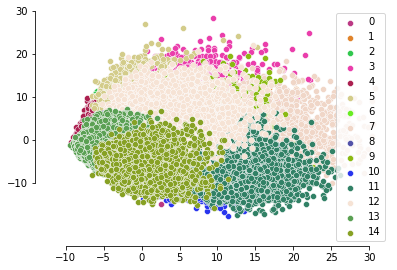

In [79]:
from random import randint
colour = []
n = 25
for i in range(n):
    colour.append('#%06X' % randint(1, 0xFFFFFF))
    
labellist75 = np.unique(label75)
 
#plotting the results:
 
for i in labellist75:
    ax = sb.scatterplot(train_img75[label75 == i, 0], train_img75[label75 == i, 1], label=i, color=colour[i])

sb.despine(offset=20, trim=True)

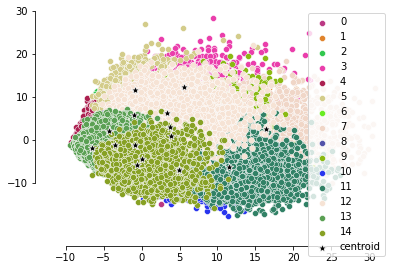

In [80]:
#Getting the Centroids
centroids75 = kmeans.cluster_centers_
labellist75 = np.unique(label75)
 
#plotting the results:

for i in labellist75:
    ax = sb.scatterplot(train_img75[label75 == i , 0] , train_img75[label75 == i , 1] , label = i, color=colour[i])
ax = sb.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, marker='*', color = 'k',label='centroid')
sb.despine(offset=20, trim=True)

In above two figures, the stars are the centroids. The centorids in outer range of the scatters can match better with the clusters. The centroids in inner range have worse matching. The data in the inner range have more similarities than those in the outer range, making the centorids in the outer range match better than those in the inner range.

Here the data clusters are varying in shape and are not concurrent and the centroids are outside of the clusters for concave,convex shapes and inside for normal shapes.Hence we use the pca dimensionality reduction to reduce data to two components rather than 75% or 95%.

#### Case 2

In [ ]:
Case with features reduced to two components with PCA

In [41]:
train_img=np.array(train_img)
train_lbl=np.array(train_lbl)
pca = PCA(2)

In [42]:
pca=pca.fit(train_img)

In [43]:
pca.n_components_

2

In [44]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)



In [45]:
train_img,test_img

(array([[-3.69763266,  9.66875611],
        [-1.0778026 , -0.8780355 ],
        [11.16635942, -2.85097873],
        ...,
        [-2.02697487,  2.71297438],
        [-6.14190948, -3.28305542],
        [-3.32049846, -6.76676096]]), array([[ 9.39576707,  0.77401565],
        [-1.92137184,  3.39635163],
        [-7.81562353,  0.75217552],
        ...,
        [-8.13925581, -2.80917833],
        [-5.40629574,  0.40023297],
        [ 8.10733105,  0.34586028]]))

In [46]:
train_dump=train_img

### Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective                                clusters,for this the Euclidean distance metric is used.
### Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [47]:
def OptimalK(data):
    
    kchange = list()
    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans = kmeans.fit(data)
        kchange.append(kmeans.inertia_)
        
    return kchange

We use this function to find the k value whithe elbow method.We select the k value from where the change is linear or small. 

In [ ]:
kchange=OptimalK(train_img)

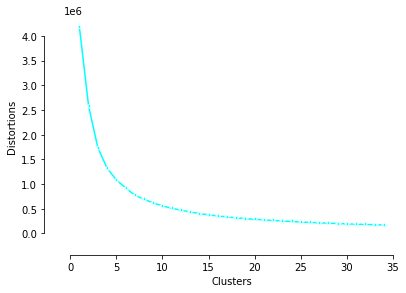

In [ ]:
ax = sb.lineplot(range(1, 20), kchange, marker = '*', color = 'cyan')
ax.set(xlabel='Clusters', ylabel='Distortions')
sb.despine(offset=20, trim=True)

From Figure we can see the optimal value of k can be 10 as from 10 the change became linear and less

In [48]:
kmeans = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, random_state=0)
label = kmeans.fit_predict(train_img)

centroids = kmeans.cluster_centers_

print(centroids.shape)


(10, 2)


Display some clusters

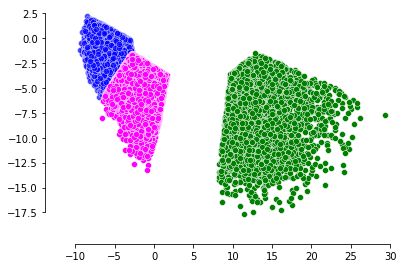

In [50]:
cluster0 = train_img[label == 0]
cluster3 = train_img[label == 3]
cluster7 = train_img[label == 7]

ax = sb.scatterplot(cluster0[:,0], cluster0[:,1], color = 'blue', alpha=0.7, marker = 'o')
ax = sb.scatterplot(cluster3[:,0], cluster3[:,1], color='green')
ax = sb.scatterplot(cluster7[:,0], cluster7[:,1], color='magenta')
sb.despine(offset=20, trim=True)

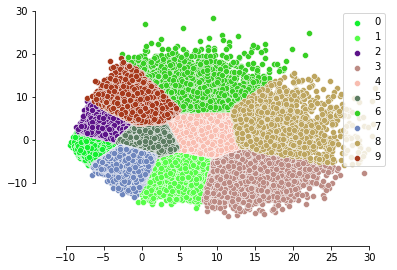

In [51]:

    
labellist = np.unique(label)
 

 
for i in labellist:
    ax = sb.scatterplot(train_img[label == i, 0], train_img[label == i, 1], label=i, color=colour[i])

sb.despine(offset=20, trim=True)

Displaying the centroids of the clusters

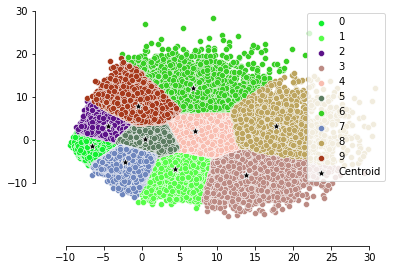

In [53]:

centroids = kmeans.cluster_centers_
labellist = np.unique(label)
 


for i in labellist:
    ax = sb.scatterplot(train_img[label == i , 0] , train_img[label == i , 1] , label = i, color=colour[i])
ax = sb.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, marker='*', color = 'k',label='Centroid')
sb.despine(offset=20, trim=True)

From the plot we can observe that the cluster centers are depicting the labels to some extent but we cannot be sure as we did not check it with any accuracy metric but the plots above seem promisingly well clustered rather than in case 1 which implies the accuracy metrics can be high.

## Kmeans using k++ intilization

In this the k means uses the k++ method for the clustering

In [ ]:
def OptimalKplus():
    kchangeplus = list()
    for k in range(1, 20):
        kmeansplus = KMeans(n_clusters=k, init='k-means++')
        kmeansplus = kmeansplus.fit(train_img)
        kchangeplus.append(kmeansplus.inertia_)
    return kchangeplus

In [ ]:
kchangeplus=OptimalKplus()

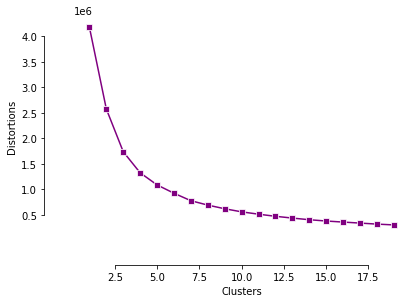

In [ ]:
ax = sb.lineplot(range(1, 20), kchangeplus, marker = 's', color = 'purple')
ax.set(xlabel='Clusters', ylabel='Distortions')
sb.despine(offset=30, trim=True)

In [55]:
kmeansplus = KMeans(n_clusters=10, init='k-means++', n_init=12, max_iter=300, random_state=0)
#predict the labels of clusters.
labelplus = kmeansplus.fit_predict(train_img)
# Cluster centroids
centroidsplus = kmeansplus.cluster_centers_
print(labelplus)
print(centroidsplus.shape)
print(kmeansplus.labels_)   

[6 8 5 ... 1 4 2]
(10, 2)
[6 8 5 ... 1 4 2]


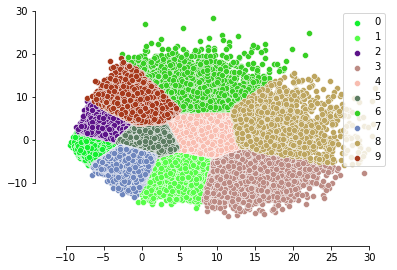

In [56]:
#Getting unique labels
 
listlabelsplus = np.unique(labelplus)
 
#plotting the results:
 
for i in listlabelsplus:
    ax = sb.scatterplot(train_img[label == i, 0], train_img[label == i, 1], label=i, color=colour[i])

sb.despine(offset=20, trim=True)

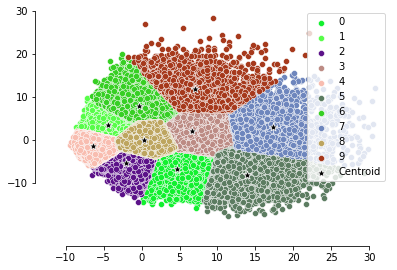

In [58]:
#Getting the Centroids
centroidsplus = kmeansplus.cluster_centers_
listlabelsplus = np.unique(labelplus)
 
#plotting the results:
 
for i in listlabelsplus:
    ax = sb.scatterplot(train_img[labelplus == i , 0] , train_img[labelplus == i , 1] , label = i, color=colour[i])
ax = sb.scatterplot(centroidsplus[:,0] , centroidsplus[:,1] , s = 80, marker='*', color = 'k',label='Centroid')
sb.despine(offset=20, trim=True)

## Random sample from each label to act as center

In [61]:
train_img2=train_dump

train_img=train_dump




In [62]:
import random
import numpy as np
labels_dict = {}
for i, label in enumerate(train_lbl):
    if label not in labels_dict:
        labels_dict[label] = []
    labels_dict[label].append(i)

samples = np.zeros((len(labels_dict), train_img2.shape[-1]))
for j, _label in enumerate(labels_dict.keys()):
    rand_index = random.sample(labels_dict[_label], k=1)
    samples[j] = train_img2[rand_index]

Intilizing the kmeans clusters with 10

In [63]:
kmeansamp = KMeans(n_clusters=10, init=samples,n_init=10, max_iter=300, random_state=0)

labelsamp = kmeansamp.fit_predict(train_img2)
# Cluster centroids
centroidsamp = kmeansamp.cluster_centers_



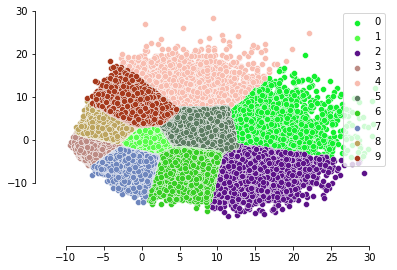

In [64]:
listlabelsamp = np.unique(labelsamp)

for i in listlabelsamp:
    ax = sb.scatterplot(train_img2[labelsamp == i, 0],train_img2[labelsamp == i, 1], label=i, color=colour[i])

sb.despine(offset=20, trim=True)

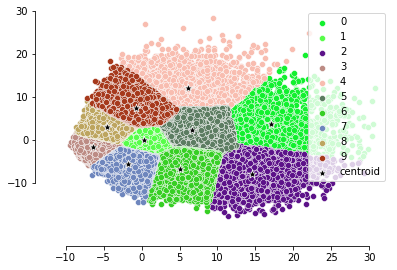

In [65]:
#Getting the Centroids
centroidsamp = kmeansamp.cluster_centers_
listlabelsamp = np.unique(labelsamp)
 

 
 for i in listlabelsamp:
    ax = sb.scatterplot(train_img2[labelsamp == i , 0] , train_img2[labelsamp == i , 1] , label = i, color=colour[i])
ax = sb.scatterplot(centroidsamp[:,0] , centroidsamp[:,1] , s = 80, marker='*', color = 'k',label='centroid')
sb.despine(offset=20, trim=True)

## Plot of  intial and final cluster centroids.

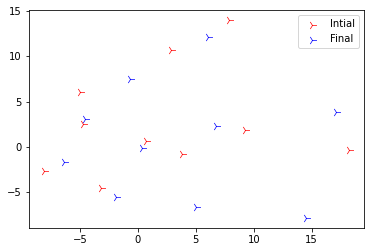

In [66]:
ax = sb.scatterplot( samples[:,0] ,  samples[:,1] , s = 80, marker='4', color = 'red',label='Intial')
ax = sb.scatterplot(centroidsamp[:,0] , centroidsamp[:,1] , s = 80, marker='4', color = 'blue',label='Final')

- The intial cluster centres were a vague representation of labels while the finals clusters centers came more farther to the labels.So we cannot be sure whether they are representing the labels correctly.  

## Comparison between all three types centroids

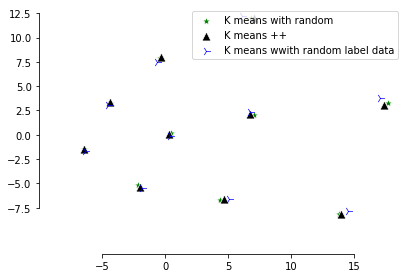

In [67]:
ax = sb.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, marker='*', color = 'green',label='K means with random')
ax = sb.scatterplot(centroidsplus[:,0] , centroidsplus[:,1] , s = 80, marker='^', color = 'k',label='K means ++')
ax = sb.scatterplot(centroidsamp[:,0] , centroidsamp[:,1] , s = 80, marker='4', color = 'blue',label='K means wwith random label data')


sb.despine(offset=30, trim=True)
    

- From the plot we can see that most of the cluster centers in the three approches are comming close.This can infer that the clusters are taking the 3 intilizations to the same extent which is a postive sign that the centers are very close to the label representaions.

### Variance Calucalation

In [72]:
import numpy as np
re_random = kmeans.predict(X=train_img)
re_kplus = kmeansplus.predict(X=train_img)
re_randomlabel = kmeansamp.predict(X=train_img)
var_1 = 0
for i, label in enumerate(re_random):
    var_1 += np.linalg.norm(x=(train_img[i] - centroids[label]))
var_2 = 0
for i, label in enumerate(re_kplus):
    var_2 += np.linalg.norm(x=(train_img[i] - centroidsplus[label]))
var_3 = 0
for i, label in enumerate(re_randomlabel):
    var_3 += np.linalg.norm(x=(train_img[i] - centroidsamp[label]))
print("Variance in case 1 using random as init:{}\nVariance in case 2 using k++ as init:{}\nVariance in case 3 using random label sample from labels as init:{}".format(var_1,var_2,var_3))

Variance in case 1 using random as init:160511.83425467767
Variance in case 2 using k++ as init:160596.9772335385
Variance in case 3 using random label sample from labels as init:160564.03095369463


### Summary

- Variance from case 1 to case 2 increased which indicates the centroids moving away from labels but we in case 3 the variance decreased to some extent than k++ which indicates that third method has postive effects in predicting the labels form centers. 

- Variance values here are very close to each other which infers that the clusters centers are closely representing the labels